In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/data.csv").dropna()

In [3]:
df["class"] = df["class"].astype(int) 

In [4]:
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


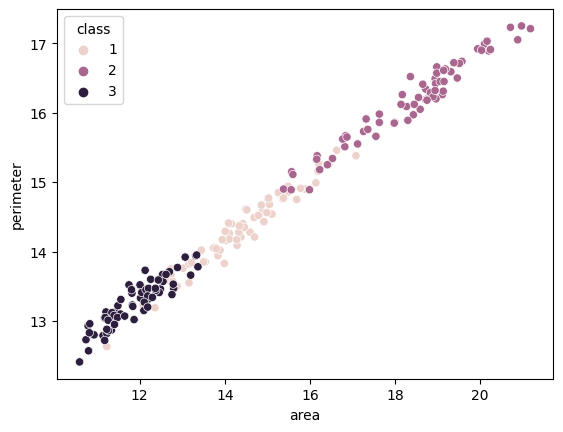

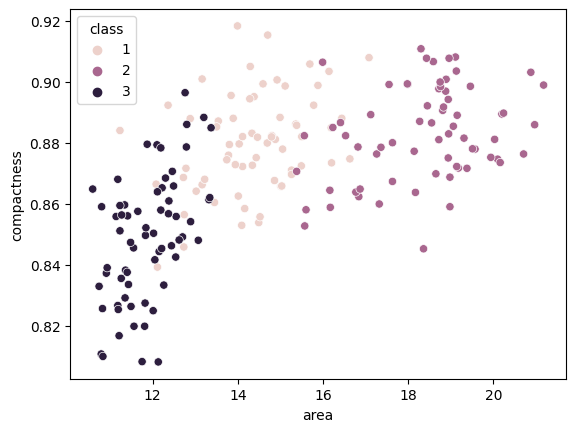

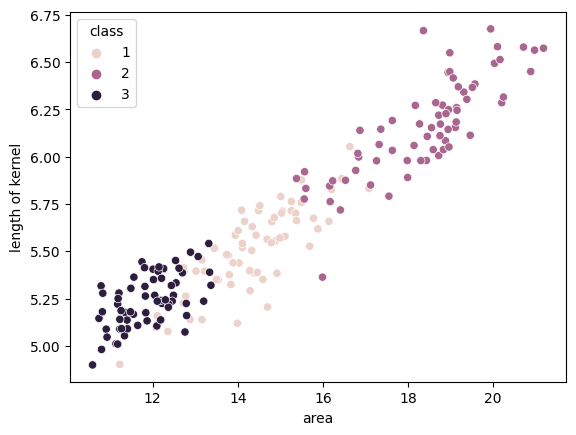

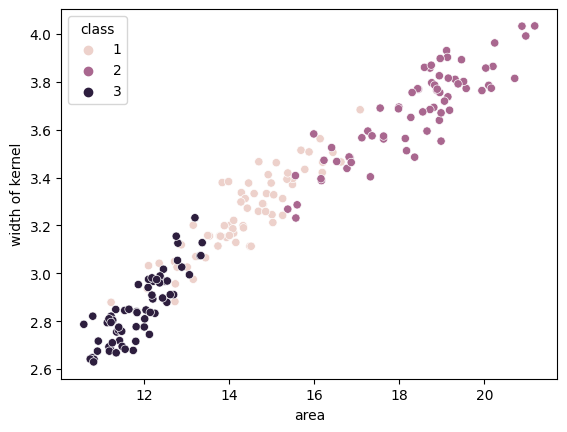

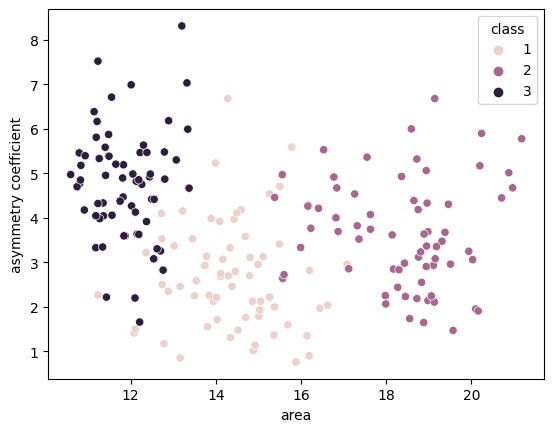

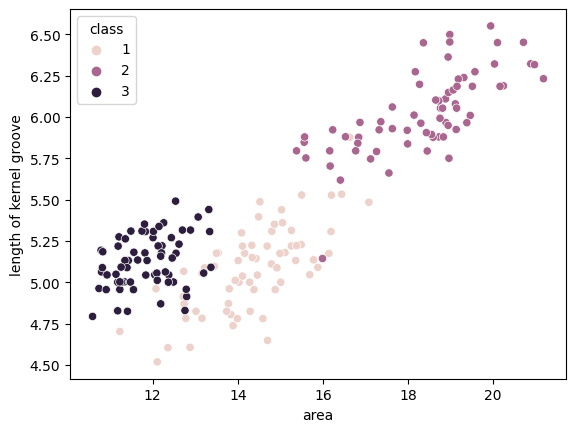

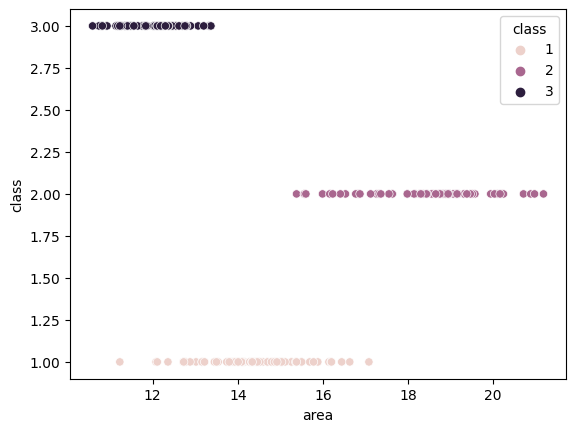

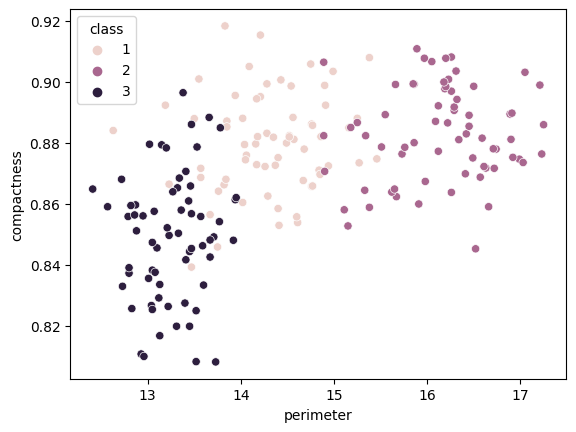

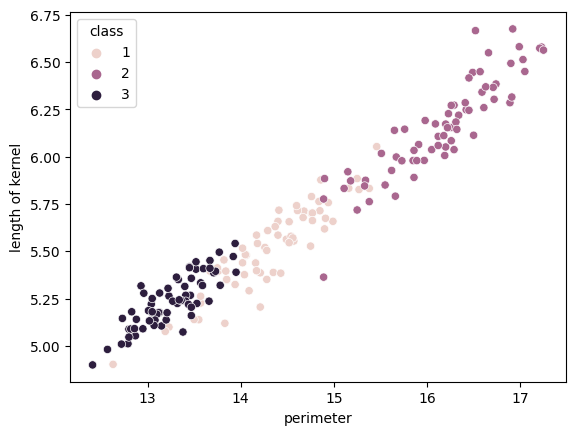

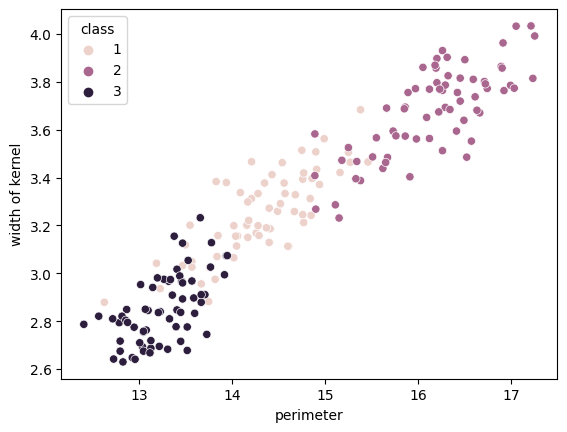

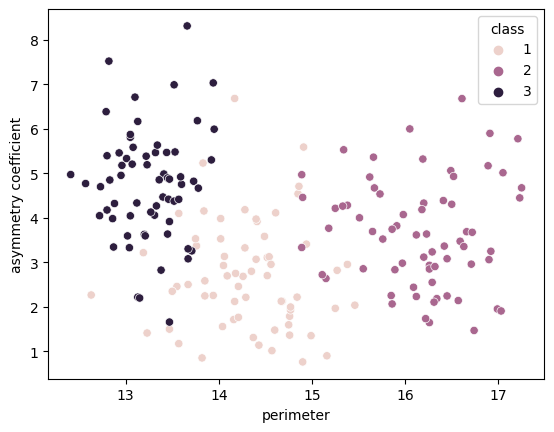

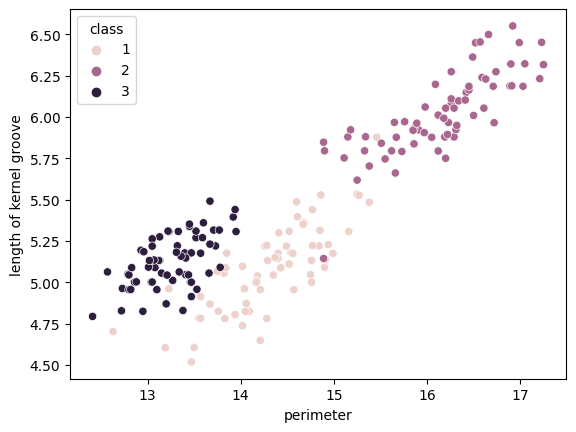

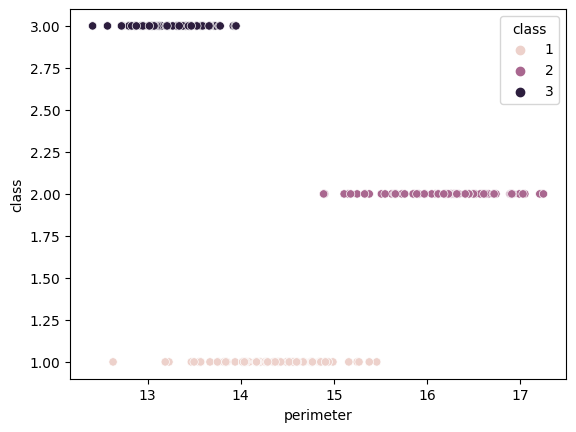

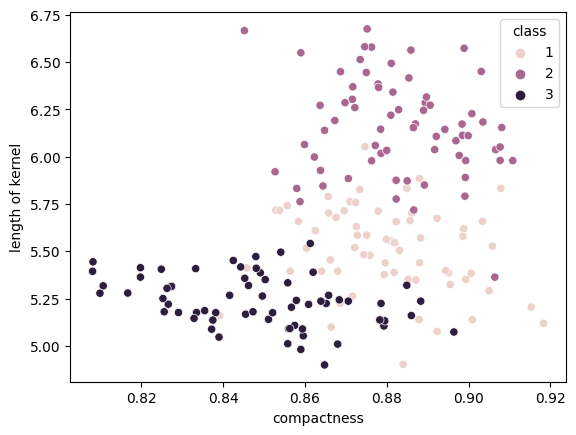

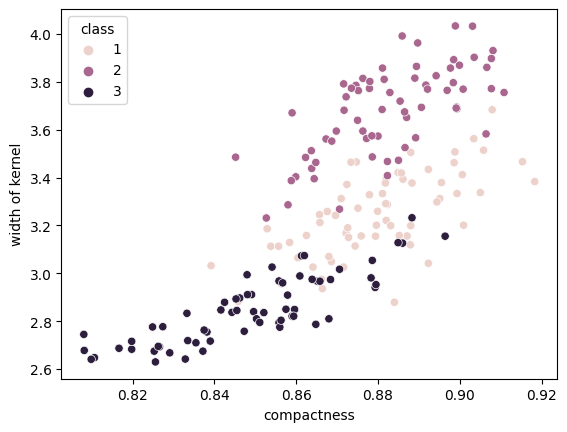

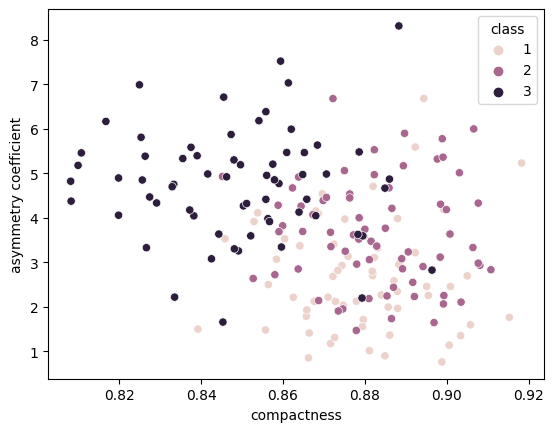

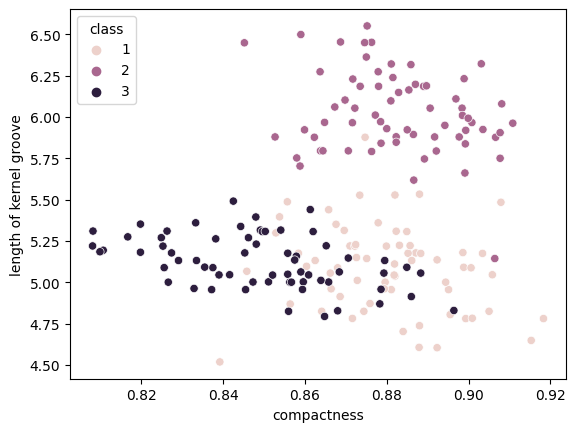

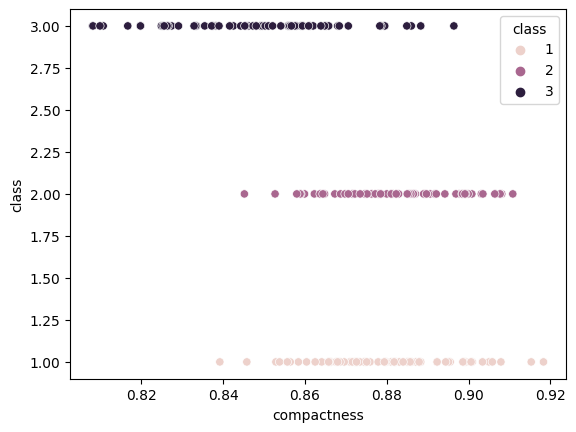

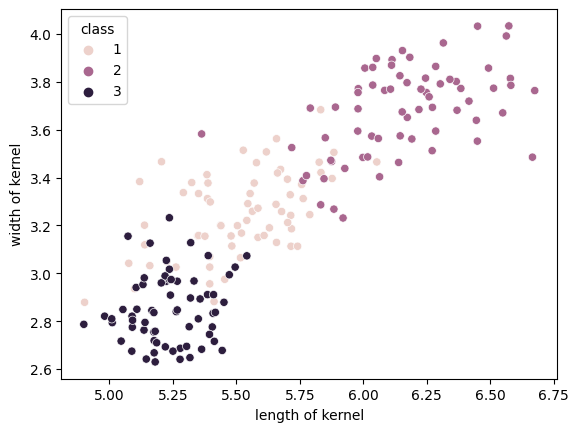

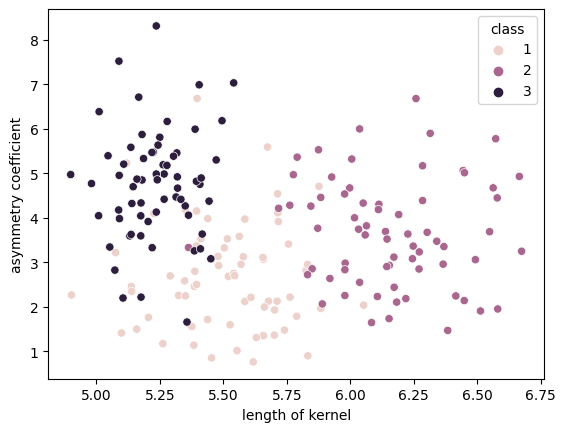

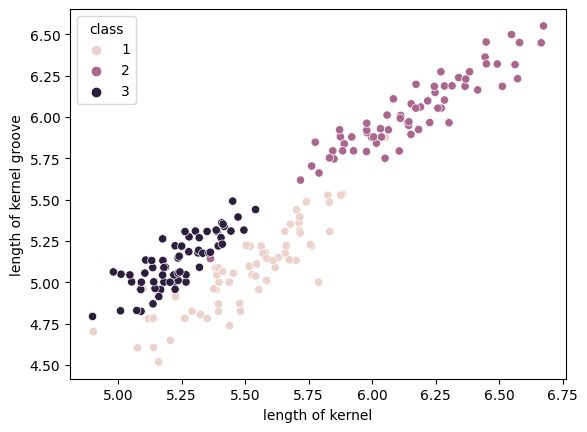

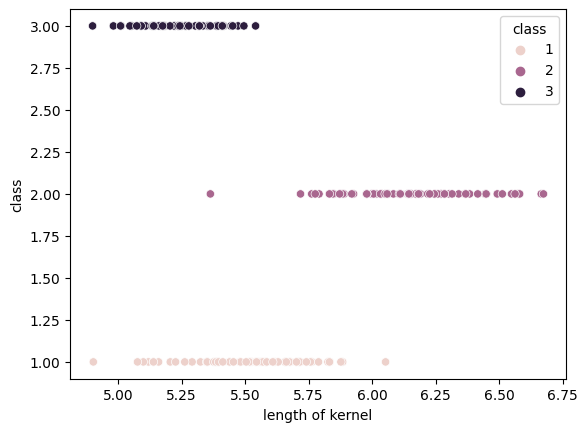

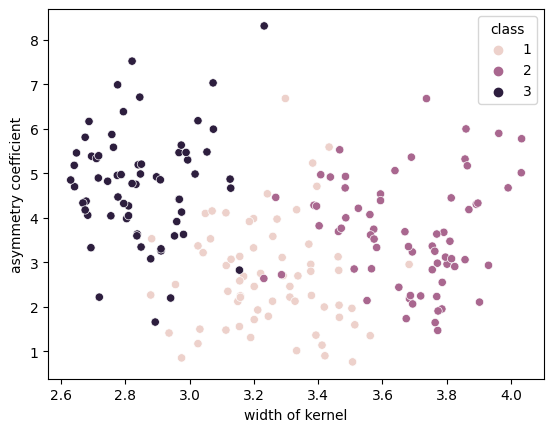

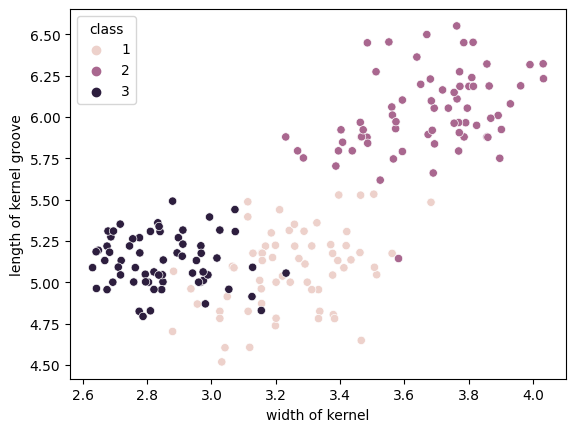

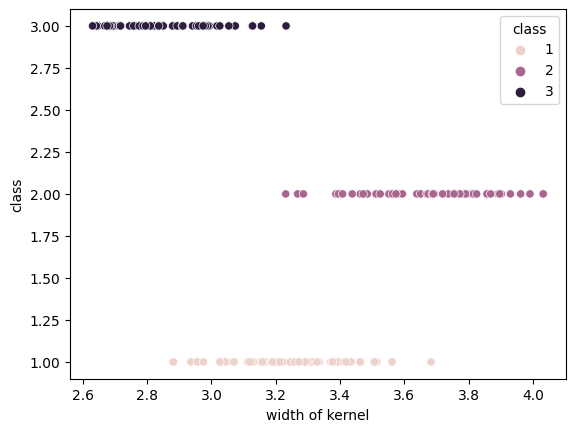

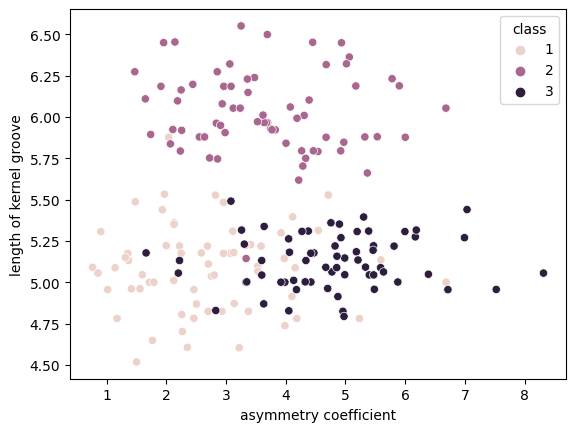

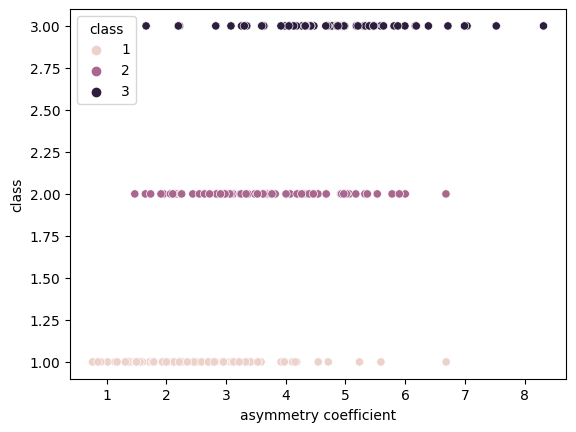

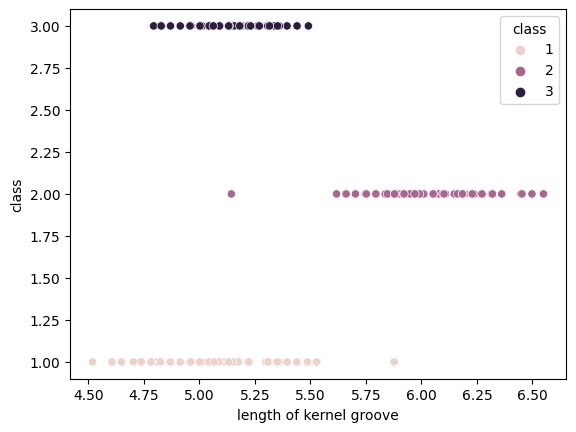

In [5]:
columns = [column for column in df.columns]
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        sns.scatterplot(data = df, x = columns[i], y = columns[j], hue = "class")
        plt.show()

# Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
# here x and y are two chosen features, not feature and target
x = "compactness"
y = "asymmetry coefficient"
X = df[[x, y]].values

In [8]:
kmeans = KMeans(n_clusters = 3).fit(X)

C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0,
       0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0,
       2])

In [10]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns = [x, y, "predicted class"])
clusters_df["predicted class"] = clusters_df["predicted class"].astype(int)

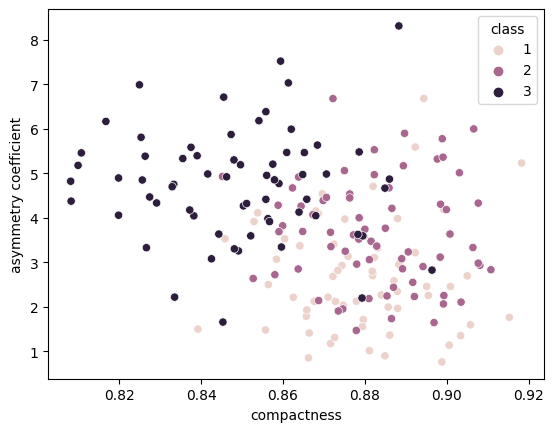

In [11]:
# Original classes
sns.scatterplot(data = df, x = x, y = y, hue = "class")
plt.show()

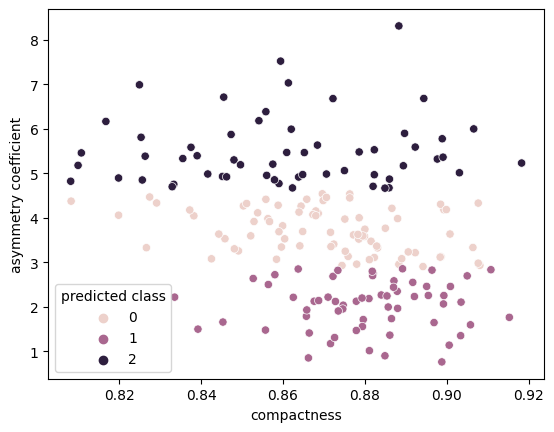

In [12]:
# Clustered classes
sns.scatterplot(data = clusters_df, x = x, y = y, hue = "predicted class")
plt.show()

# Higher Dimensions

In [13]:
X = df[columns[:-1]].values

In [14]:
kmeans = KMeans(n_clusters = 3).fit(X)
clusters_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns = df.columns)
clusters_df["class"] = clusters_df["class"].astype(int)

C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


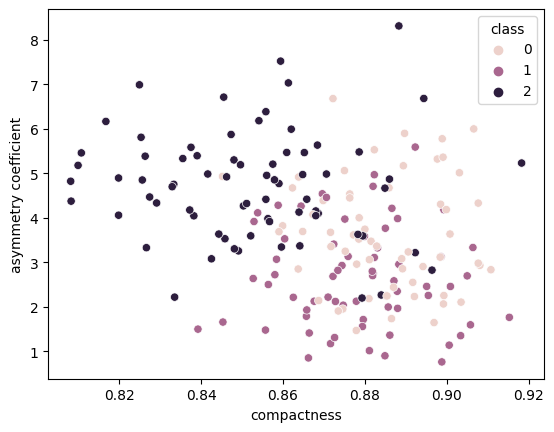

In [15]:
# KMeans classes
sns.scatterplot(data = clusters_df, x = x, y = y, hue = "class")
plt.show()

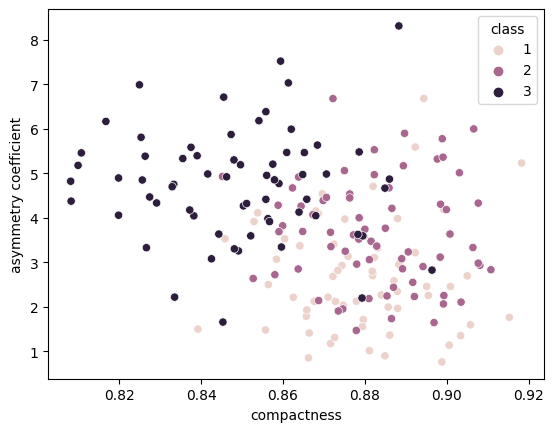

In [16]:
# Original classes
sns.scatterplot(data = df, x = x, y = y, hue = "class")
plt.show()

# PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components = 2)
transformed_x = pca.fit_transform(X)

In [46]:
X.shape

(199, 7)

In [47]:
transformed_x.shape

(199, 2)

In [48]:
transformed_x[:5]

#each sample is a 2 dimensional point

array([[ 0.57012287, -1.43217281],
       [ 0.21214724, -2.70135005],
       [-0.75121694, -1.13589426],
       [-1.15003604, -1.62238169],
       [ 1.52055057, -2.20603586]])

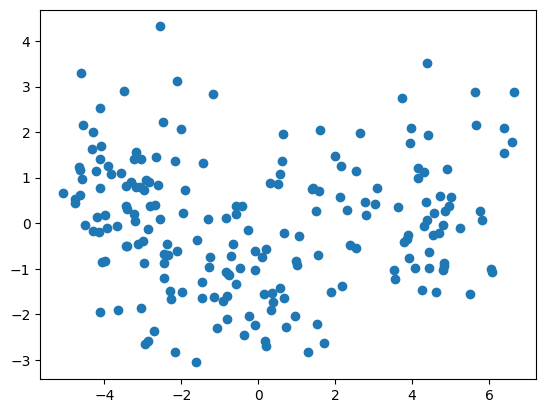

In [49]:
plt.scatter(transformed_x[:, 0], transformed_x[:, 1])
plt.show()

In [50]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns = ["pca1", "pca2", "class"])
kmeans_pca_df

,pca1,pca2,class
0,0.570123,-1.432173,1.0
1,0.212147,-2.701350,1.0
2,-0.751217,-1.135894,1.0
3,-1.150036,-1.622382,1.0
4,1.520551,-2.206036,1.0
...,...,...,...
194,-3.127404,-0.457705,2.0
195,-4.190019,0.133754,2.0
196,-2.546613,4.318267,2.0
197,-3.418191,-0.507097,2.0


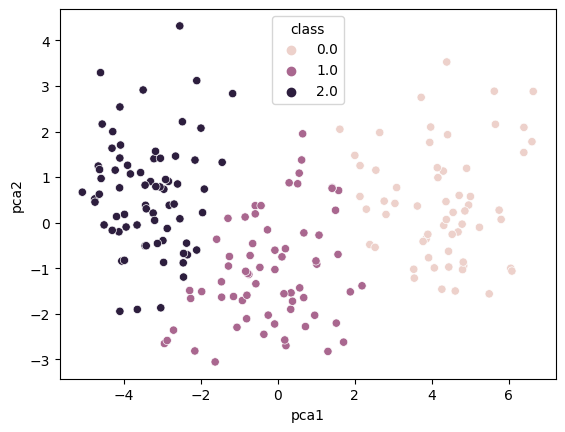

In [51]:
# KMeans classes

sns.scatterplot(data = kmeans_pca_df, x = "pca1", y = "pca2", hue = "class")
plt.show()

In [52]:
true_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns = ["pca1", "pca2", "class"])
true_pca_df

,pca1,pca2,class
0,0.570123,-1.432173,1.0
1,0.212147,-2.701350,1.0
2,-0.751217,-1.135894,1.0
3,-1.150036,-1.622382,1.0
4,1.520551,-2.206036,1.0
...,...,...,...
194,-3.127404,-0.457705,3.0
195,-4.190019,0.133754,3.0
196,-2.546613,4.318267,3.0
197,-3.418191,-0.507097,3.0


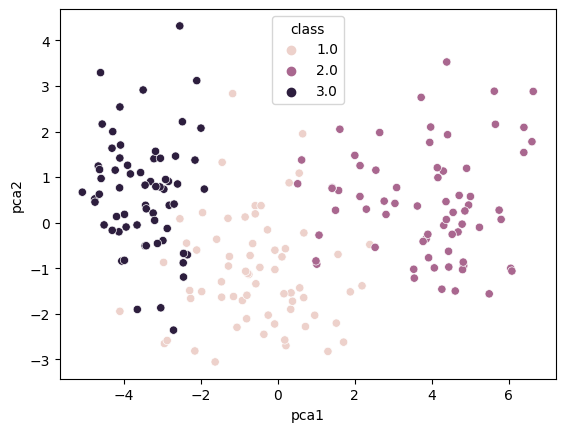

In [53]:
# True classes

sns.scatterplot(data = true_pca_df, x = "pca1", y = "pca2", hue = "class")
plt.show()